In [3]:
import numpy as np
import pandas as pd

train_data = pd.read_csv("train_set.csv", index_col=None)
test_data = pd.read_csv("test_set.csv", index_col=None)

X_train = train_data.drop(columns="truth").values
y_train = train_data[['truth']].values.ravel()

X_test = test_data.drop(columns="truth").values
y_test = test_data[['truth']].values.ravel()

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Khởi tạo các mô hình
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

In [7]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

metrics = []

# Huấn luyện và đánh giá mô hình
for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)
    
    # Tính các độ đo cho từng nhãn và Accuracy
    precision_0 = precision_score(y_test, y_pred, pos_label=0)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    f1_0 = f1_score(y_test, y_pred, pos_label=0)
    
    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Lưu các kết quả vào danh sách
    metrics.append({
        "Model": name,
        "Precision_0": precision_0,
        "Recall_0": recall_0,
        "F1_0": f1_0,
        "Precision_1": precision_1,
        "Recall_1": recall_1,
        "F1_1": f1_1,
        "Accuracy": accuracy
    })

# Tạo DataFrame từ danh sách kết quả
metrics_df = pd.DataFrame(metrics)

# Hiển thị bảng kết quả
print(metrics_df)


c:\Users\baolo\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\baolo\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 119817, number of negative: 38126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1835
[LightGBM] [Info] Number of data points in the train set: 157943, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.758609 -> initscore=1.145069
[LightGBM] [Info] Start training from score 1.145069
                 Model  Precision_0  Recall_0      F1_0  Precision_1  \
0        Decision Tree     0.462323  0.426173  0.443513     0.821264   
1        Random Forest     0.796844  0.419215  0.549396     0.838947   
2  K-Nearest Neighbors     0.268633  0.167857  0.206612     0.762748   
3          Naive Bayes     0.794013  0.273637  0.407009     0.808228   
4  Logistic Regression     0.785765  0.408350  0.537414     0.836225   
5    Gradi

In [9]:
#Thêm kết quả của mô hình Tabnet Classifier
metrics.append({
        "Model": 'Tabnet Classifier',
        "Precision_0": 0.79,
        "Recall_0": 0.51,
        "F1_0": 0.62,
        "Precision_1": 0.86,
        "Recall_1": 0.96,
        "F1_1": 0.9,
        "Accuracy": 0.85
    })


In [11]:
metrics_df = pd.DataFrame(metrics)

In [12]:
metrics_df

,Model,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1,Accuracy
0,Decision Tree,0.462323,0.426173,0.443513,0.821264,0.841765,0.831388,0.741193
1,Random Forest,0.796844,0.419215,0.549396,0.838947,0.965878,0.897949,0.833587
2,K-Nearest Neighbors,0.268633,0.167857,0.206612,0.762748,0.854100,0.805843,0.688031
3,Naive Bayes,0.794013,0.273637,0.407009,0.808228,0.977337,0.884774,0.807043
4,Logistic Regression,0.785765,0.408350,0.537414,0.836225,0.964456,0.895775,0.829879
5,Gradient Boosting,0.785419,0.452420,0.574129,0.846023,0.960539,0.899651,0.837575
6,XGBoost,0.767709,0.445218,0.563591,0.843826,0.956992,0.896853,0.833144
7,LightGBM,0.792743,0.462736,0.584368,0.848596,0.961377,0.901473,0.840707
8,Tabnet Classifier,0.790000,0.510000,0.620000,0.860000,0.960000,0.900000,0.850000


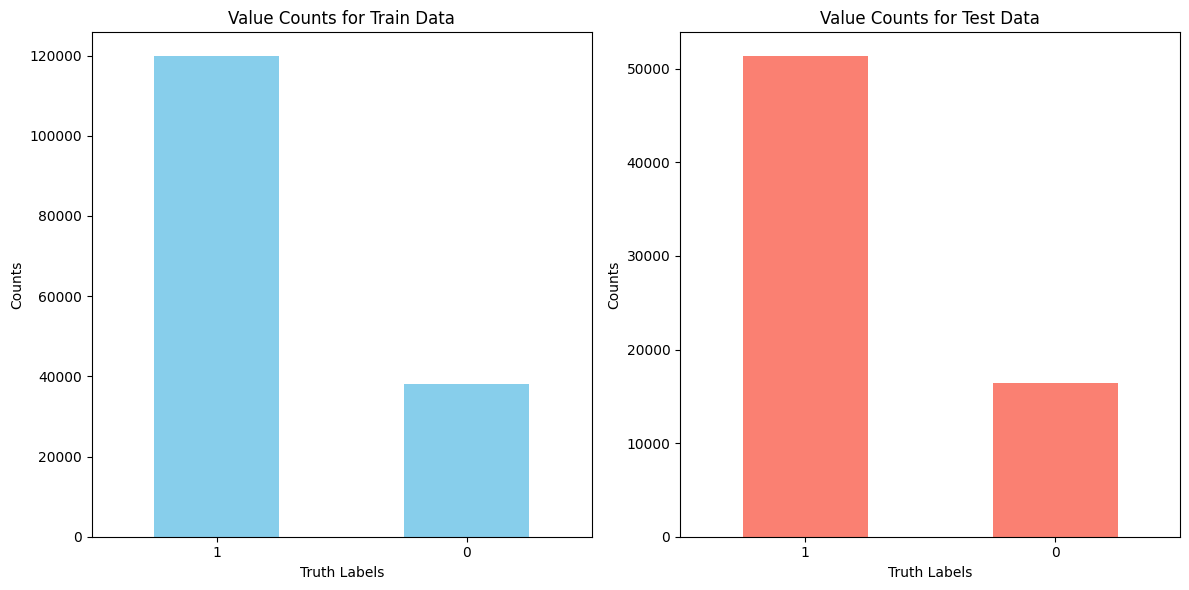

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có train_data và test_data là các DataFrame
# Ví dụ:
# train_data = pd.read_csv('train_data.csv')
# test_data = pd.read_csv('test_data.csv')

# Tính giá trị đếm cho cột 'truth'
train_counts = train_data['truth'].value_counts()
test_counts = test_data['truth'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

# Biểu đồ cho tập dữ liệu huấn luyện
plt.subplot(1, 2, 1)  # 1 hàng, 2 cột, vị trí đầu tiên
train_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts for Train Data')
plt.xlabel('Truth Labels')
plt.ylabel('Counts')
plt.xticks(rotation=0)

# Biểu đồ cho tập dữ liệu kiểm tra
plt.subplot(1, 2, 2)  # 1 hàng, 2 cột, vị trí thứ hai
test_counts.plot(kind='bar', color='salmon')
plt.title('Value Counts for Test Data')
plt.xlabel('Truth Labels')
plt.ylabel('Counts')
plt.xticks(rotation=0)

plt.tight_layout()  # Đảm bảo các biểu đồ không bị chồng lên nhau
plt.show()
